In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [41]:
df = pd.read_csv('export_yardi_jourentline.csv', lineterminator="\n")
df[0:10]

,GLCODE,GLNAME,PROPERTY,PROPERTYNAME,UNIT,BUILDING,SPECIALCIRCUMSTANCE,USAGEAMOUNT,USAGETYPE,DATE,PERIOD,DESCRIPTION,CONTROL,REFERENCE,AMOUNT,DEBITCREDIT,BALANCE,REMARKS
0,1110-0000,Cash,ap-mc11,4203 11TH LLC,42031,,,,,09/09/2020,12/01/2020,Webster S8 (t0034597),K-396581,165,8500.00,Credit,1813181.59,First buyout check
1,1110-0000,Cash,ap-mc11,4203 11TH LLC,42032,,,,,09/29/2020,12/01/2020,Webster (t0034598),K-405215,173,2500.00,Credit,1810681.59,
2,1110-0000,Cash,ap-mc11,4203 11TH LLC,42031,,,,,10/27/2020,12/01/2020,Webster S8 (t0034597),K-417819,183,9100.00,Credit,1801581.59,
3,1110-0000,Cash,ap-mc11,4203 11TH LLC,42052,,,,,10/29/2020,12/01/2020,Jones (t0034602),K-420897,187,3500.00,Credit,1798081.59,First Buyout Check
4,1110-0000,Cash,ap-mc11,4203 11TH LLC,42053,,,,,11/02/2020,12/01/2020,Dow (t0034603),K-421957,190,3500.00,Credit,1794581.59,First Buyout Check
5,1110-0000,Cash,ap-mc11,4203 11TH LLC,42052,,,,,11/03/2020,12/01/2020,Jones (t0034602),K-422953,192,3500.00,Credit,1791081.59,2nd buyout check
6,1110-0000,Cash,ap-mc11,4203 11TH LLC,42032,,,,,11/03/2020,12/01/2020,EMC Capital (emc),K-422964,193,1800.00,Credit,1789281.59,close out contract
7,1110-0000,Cash,ap-mc11,4203 11TH LLC,42031,,,,,11/03/2020,12/01/2020,EMC Capital (emc),K-422964,193,2640.00,Credit,1786641.59,close out contract
8,1110-0000,Cash,ap-mc11,4203 11TH LLC,42032,,,,,11/03/2020,12/01/2020,Webster (t0034598),K-423068,194,2500.00,Credit,1784141.59,2nd buyout check
9,1110-0000,Cash,ap-mc11,4203 11TH LLC,,,,,,12/01/2020,12/01/2020,Afton Properties Inc. (aftonpr),K-435761,207,360.53,Credit,1783781.06,Management Fees


In [42]:
df.columns = df.columns.map(lambda c: c.strip())

In [43]:
df = df.drop(columns=['BUILDING', 'SPECIALCIRCUMSTANCE', 'USAGEAMOUNT', 'USAGETYPE'])
df['AMOUNT'] = df['AMOUNT'].astype(np.int64)

In [44]:
label_encoder = LabelEncoder() 
amount_col = df['AMOUNT'].copy()
object_cols = [col for col in df.columns if df[col].dtype == 'object']
label_df = df.drop(columns=['AMOUNT'])
for col in set(object_cols):
    label_df[col] = label_encoder.fit_transform(label_df[col])

In [45]:
label_df['AMOUNT'] = amount_col.copy()

In [46]:
print(label_df['AMOUNT'].value_counts())

3          14114
1           9108
0           2653
2           1820
4           1226
           ...  
3787           1
10620          1
26134          1
448000         1
1670000        1
Name: AMOUNT, Length: 2815, dtype: int64


In [47]:
neighbors = NearestNeighbors(n_neighbors=3)
nbrs = neighbors.fit(label_df)
distances, indices = nbrs.kneighbors(label_df)

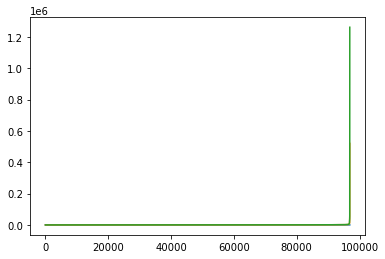

In [48]:
distances = np.sort(distances, axis=0)
distance = distances [:,1]
plt.plot(distances)

In [49]:
model = DBSCAN(
  eps = 10000,
  metric="euclidean",
  min_samples = 3,
  n_jobs = -1)

preds = model.fit_predict(label_df)

In [50]:
label_df['ANOMALY'] = preds.copy()
print(label_df['ANOMALY'].value_counts())

 0     96705
-1       125
 1         9
 6         8
 2         5
 3         5
 4         5
 11        5
 8         4
 10        4
 12        4
 5         3
 7         3
 9         3
 13        3
 14        3
Name: ANOMALY, dtype: int64


<AxesSubplot:ylabel='AMOUNT'>

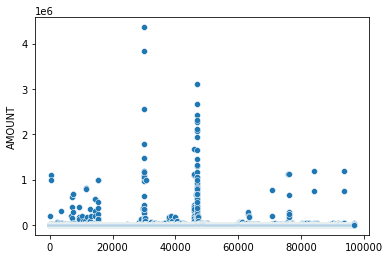

In [51]:
sns.scatterplot(data=label_df['AMOUNT'])

In [52]:
outlier_df = pd.DataFrame(columns = ['AMOUNT', 'INDEX'])

for index in range(len(label_df)):
    if label_df['ANOMALY'][index] == -1:
        outlier_df = outlier_df.append({'AMOUNT': label_df['AMOUNT'][index], 'INDEX': index}, ignore_index=True)
        
print('Total Amount of Outliers: ', outlier_df.shape[0])
print(outlier_df.sort_values(by='AMOUNT')[0:125])

Total Amount of Outliers:  125
      AMOUNT  INDEX
44     63000  30014
47     65353  30357
46     65353  30322
113    67676  47107
13     67676  12846
..       ...    ...
37   2560000  29845
82   2663000  46879
72   3100000  46868
36   3840000  29843
38   4360000  29846

[125 rows x 2 columns]
